<a href="https://colab.research.google.com/github/alfinbakti1/project1/blob/master/Tugas_Besar_SKO_Perancangan_FTTB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [581]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [582]:
#Parameter 
Pt = 3 #dbm Daya Keluaran sumber optik(OLT)
SM =  6 #safety margin 6 dB
R = 0.85 # Responsivitas (A/W)
M = -0.1 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
K = 1.38 * 10**-23 #Konstanta Boltzman
Teff= 290 #Kelvin
B = 10* 10**9 # Bandwith 7 Ghz 
Req = 50 # Resistensi Ekivalensi
id = 80*10**-9 #Arus gelap(A)
F = 2 #F(M), Faktor Gain


#Perhitungan jarak
#Jarak dari OLT Ke odc = 8 km
#Jarak odc ke Odp =  100 m
#Jarak odp ke ont = 66 m 
#Jarak Total = 8000 + 166 = 8166 m
L = np.arange(0.166,8.166,1) #Km
Ns = 3 #jumlah sambungan
Nc = 6 #jumlah konektor
Sp = 3.5 + 15.5 #jenis PS 1:2 1:32
Ac = 0.3 #redaman konektor(dB/buah)
As = 0.1 #redaman dB/splice
Aserat =  0.4 # redaman serat optic dB/Km G.652(1310/1490)

#lambda
NtL = lambda x: 10*np.log10(x)
LtN = lambda x: 10**(x/10)

In [583]:
#Rumus Pr
def P_receiver():
  hambatan_fiber = L * Aserat 
  hambatan_splicer = Ns * As
  hambatan_connector = Nc * Ac
  alfa_total  = hambatan_fiber+ hambatan_connector + hambatan_splicer  + Sp + SM
  Pr = Pt - alfa_total
  return Pr,alfa_total
Pr,alfa_total = P_receiver()
print(alfa_total)
print(Pr)
Prnum = LtN(Pr)
print('Daya Terima = ', Prnum,'Watt')

[27.1664 27.5664 27.9664 28.3664 28.7664 29.1664 29.5664 29.9664]
[-24.1664 -24.5664 -24.9664 -25.3664 -25.7664 -26.1664 -26.5664 -26.9664]
Daya Terima =  [0.00383142 0.0034943  0.00318684 0.00290643 0.0026507  0.00241746
 0.00220475 0.00201076] Watt


In [584]:
#Rumus Arus Primer
def arus_primer():
  ip = R * Prnum
  return ip
ip = arus_primer()
print('Arus Primer = ',ip,'Watt')

Arus Primer =  [0.00325671 0.00297015 0.00270881 0.00247047 0.00225309 0.00205484
 0.00187404 0.00170915] Watt


In [585]:
#RUMUS PERHITUNGAN SIGNAL POWER
def signal_power():
  sig = (ip*M)**2
  return sig
signal = signal_power()
print('Signal = ',signal,'A')

Signal =  [1.06061521e-07 8.82181308e-08 7.33766451e-08 6.10320351e-08
 5.07642356e-08 4.22238521e-08 3.51202704e-08 2.92117686e-08] A


In [586]:
#RUMUS PERHITUNGAN NOISE POWER
def noise_power():
  BDC = 2*q*id*B*(M**2)*F #Dark Current
  SNC = 2*q*ip*B*(M**2)*F #Short Noise Current
  NT =  (4*K*Teff*B)/Req #Derau Thermal
  noi = BDC + SNC + NT
  noise_rumus = BDC + SNC + NT
  print(noise_rumus)
  return noise_rumus
noise = noise_power()
print('Noise = ',noise,'A')

[3.41003448e-12 3.39169496e-12 3.37496911e-12 3.35971496e-12
 3.34580301e-12 3.33311516e-12 3.32154370e-12 3.31099040e-12]
Noise =  [3.41003448e-12 3.39169496e-12 3.37496911e-12 3.35971496e-12
 3.34580301e-12 3.33311516e-12 3.32154370e-12 3.31099040e-12] A


In [587]:
#RUMUS SNR
def snr():
  snr = signal/noise
  snr_dB = NtL(snr)
  return snr_dB
SNR = snr()
print('SNR = ',SNR,'dBm')

SNR =  [44.92799081 44.15141066 43.37288049 42.59255418 41.81057484 41.02707533
 40.24217881 39.45599929] dBm


In [588]:
#RUMUS Q
def Q_rumus():
  Q_rum = 0.5*(10**(SNR/20))
  return Q_rum
Q = Q_rumus()
print(Q)

[88.17988838 80.63814657 73.72487227 67.39035023 61.58837514 56.27607125
 51.41371014 46.96452876]


In [589]:
#RUMUS BER
kali_list = []
def BER_rumus():
  akr = (m.sqrt(2*m.pi) * Q)
  #exp = (m.exp(Q/2)**2)/Q
  #B= akr * exp
  for i in range(len(Q)):
    kali = m.exp(-(Q[i]/2)**2)
    kali_list.append(kali)
  B = (1/akr) * (kali_list)
  return B
B = BER_rumus()
print(B)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 7.75576057e-290 2.83069131e-242]


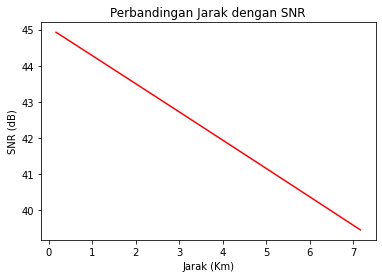

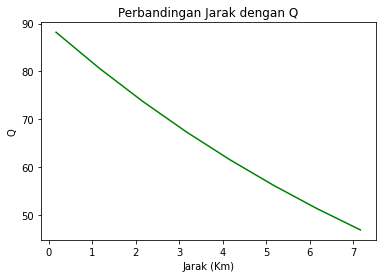

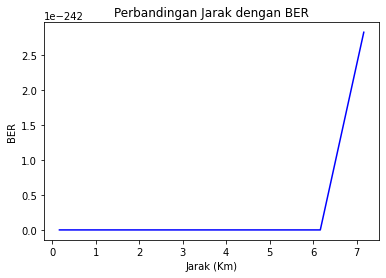

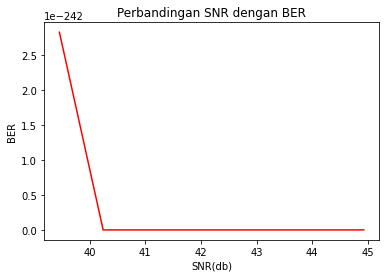

In [590]:
#GRAFIK
def grafik_snr():
  plt.figure()
  plt.plot(L,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_Q():
  plt.figure()
  plt.plot(L,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_BER():
  plt.figure()
  plt.plot(L,B,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def grafik_BER_SNR():
  plt.figure()
  plt.plot(SNR,B,'r')
  plt.title('Perbandingan SNR dengan BER')
  plt.xlabel('SNR(db)')
  plt.ylabel('BER')
  plt.show()

grafik_snr()
grafik_Q()
grafik_BER()
grafik_BER_SNR()